<a href="https://colab.research.google.com/github/siva41/107-2-Multimedia/blob/master/keras_MLP_h1000_dropout_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [5]:
model = Sequential()

W0616 03:25:24.021546 140685635889024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [6]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

W0616 03:25:24.050615 140685635889024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 03:25:24.055316 140685635889024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [7]:
model.add(Dropout(0.5))

W0616 03:25:24.075710 140685635889024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0616 03:25:24.088532 140685635889024 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Dense(units=1000,
kernel_initializer='normal',
activation='relu'))
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

W0616 03:25:24.177583 140685635889024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0616 03:25:24.202755 140685635889024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
train_history =model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10, batch_size=200,verbose=2)

W0616 03:25:24.296635 140685635889024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.3633 - acc: 0.8866 - val_loss: 0.1322 - val_acc: 0.9611
Epoch 2/10
 - 1s - loss: 0.1596 - acc: 0.9507 - val_loss: 0.0990 - val_acc: 0.9707
Epoch 3/10
 - 1s - loss: 0.1174 - acc: 0.9624 - val_loss: 0.0893 - val_acc: 0.9723
Epoch 4/10
 - 1s - loss: 0.0967 - acc: 0.9696 - val_loss: 0.0843 - val_acc: 0.9741
Epoch 5/10
 - 1s - loss: 0.0850 - acc: 0.9733 - val_loss: 0.0802 - val_acc: 0.9763
Epoch 6/10
 - 1s - loss: 0.0769 - acc: 0.9757 - val_loss: 0.0794 - val_acc: 0.9766
Epoch 7/10
 - 1s - loss: 0.0647 - acc: 0.9789 - val_loss: 0.0751 - val_acc: 0.9779
Epoch 8/10
 - 1s - loss: 0.0596 - acc: 0.9807 - val_loss: 0.0796 - val_acc: 0.9771
Epoch 9/10
 - 1s - loss: 0.0583 - acc: 0.9805 - val_loss: 0.0737 - val_acc: 0.9779
Epoch 10/10
 - 1s - loss: 0.0539 - acc: 0.9825 - val_loss: 0.0770 - val_acc: 0.9796


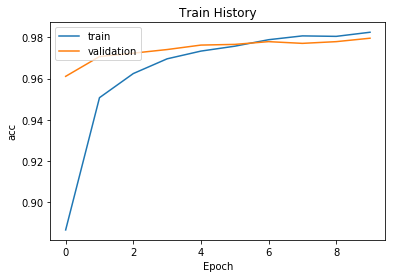

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

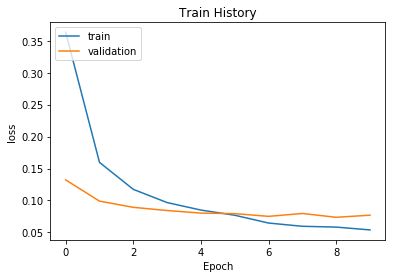

In [14]:
show_train_history(train_history,'loss','val_loss')

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 37us/step

accuracy= 0.9796


In [16]:
prediction=model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6])

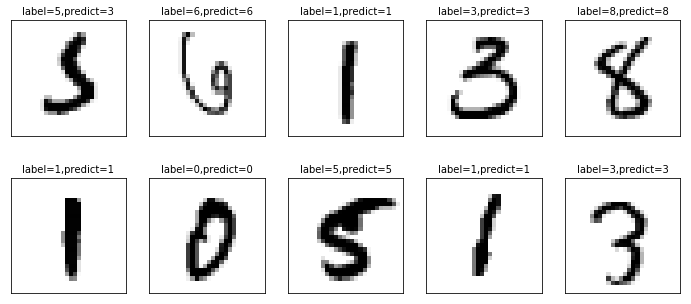

In [17]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
           title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [18]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,0,0,1,3,1,1,0
1,0,1127,3,0,0,0,3,0,2,0
2,2,0,1022,1,1,0,1,2,3,0
3,0,0,6,994,0,1,0,4,3,2
4,2,2,2,0,964,0,5,1,0,6
5,3,0,1,15,1,861,4,1,3,3
6,4,2,0,1,2,2,945,0,2,0
7,1,8,8,1,0,0,0,1002,3,5
8,3,0,4,9,2,2,4,4,945,1


In [19]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [20]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
674,5,3
1003,5,3
1393,5,3
2597,5,3
2810,5,3
3117,5,3
3702,5,3
3902,5,3
4255,5,3


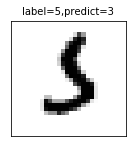

In [21]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

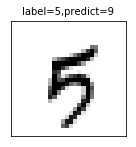

In [22]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1289,num=1)